Fig. 7.12 - Posterior Prediction for the Linear Regression
----------------------------------------------------------

In [178]:
%matplotlib inline
import numpy as np
import sklearn.linear_model as lm
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as pl
import seaborn as sns

In [89]:
def gen_polynomial_data(deg = 2):
    x = np.array([-3, -2, 0, 2, 3])
    y = 10 + x + x**deg
    y = y + np.random.normal(size = len(y), scale=5)
    return x,y

def get_V_N(V_0, X):
    V_N = np.linalg.inv(sigma**2 * np.linalg.inv(V_0) + X.T.dot(X))
    V_N = sigma**2 * V_N
    assert(V_N.shape == (N,N))
    return V_N

def get_w_N(V_0, w_0, V_N, X, y):
    w_N = V_N.dot(np.linalg.inv(V_0)).dot(w_0) + 1./sigma**2 * V_N.dot(X.T).dot(y)
    assert(w_N.shape == (N,))
    return w_N

In [83]:
x_data,y = gen_polynomial_data()
poly = PolynomialFeatures(degree = 2)

First we find the weight vector $w$ via the solution to the normal equation

$$w = (X^T X)^{-1}X^T y$$

In [84]:
X = poly.fit_transform(x_data[:,None])
N = X.shape[-1]
w_MLE = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
X_plot = np.linspace(-7,7,50)
X_test = poly.fit_transform(X_plot[:,None])
y_plot = w_MLE.dot(X_test.T)

Right now our estimate is that 

$$p(y | X, w, \sigma^2) = \mathcal{N}(y | X\cdot \hat{w}, \sigma^2)$$

Where $\hat{w}$ is the MLE solution to the original Linear Regression problem. However, we are able to calculate the posterior for $w$ given a gaussian prior, ie:

$$p(w | X, y, \sigma^2) \propto p(y | X, w, \sigma^2) p(w) = 
\mathcal{N}(y | X\cdot \hat{w}, \sigma^2)\mathcal{N}(w | w_0, V_0)$$

This gaussian multiplication is:

$$p(w | X, y, \sigma^2) = \mathcal{N}(w | w_N, V_N)$$

Where

$$V_N = \sigma^2 (\sigma^2 V_0^{-1} + X^T X)^{-1}$$
$$w_N = V_N V_0^{-1} w_0 + \frac{1}{\sigma^2} V_N X^{T} y$$

In [190]:
sigma = np.sqrt(5)
tau = np.sqrt(15)
w_0 = np.zeros(N)
V_0 = np.identity(N) * tau**2
V_N = get_V_N(V_0, X)
w_N = get_w_N(V_0, w_0, V_N, X, y)
w_err = np.sqrt(sigma**2 + np.diag(X_test.dot(V_N.dot(X_test.T))))

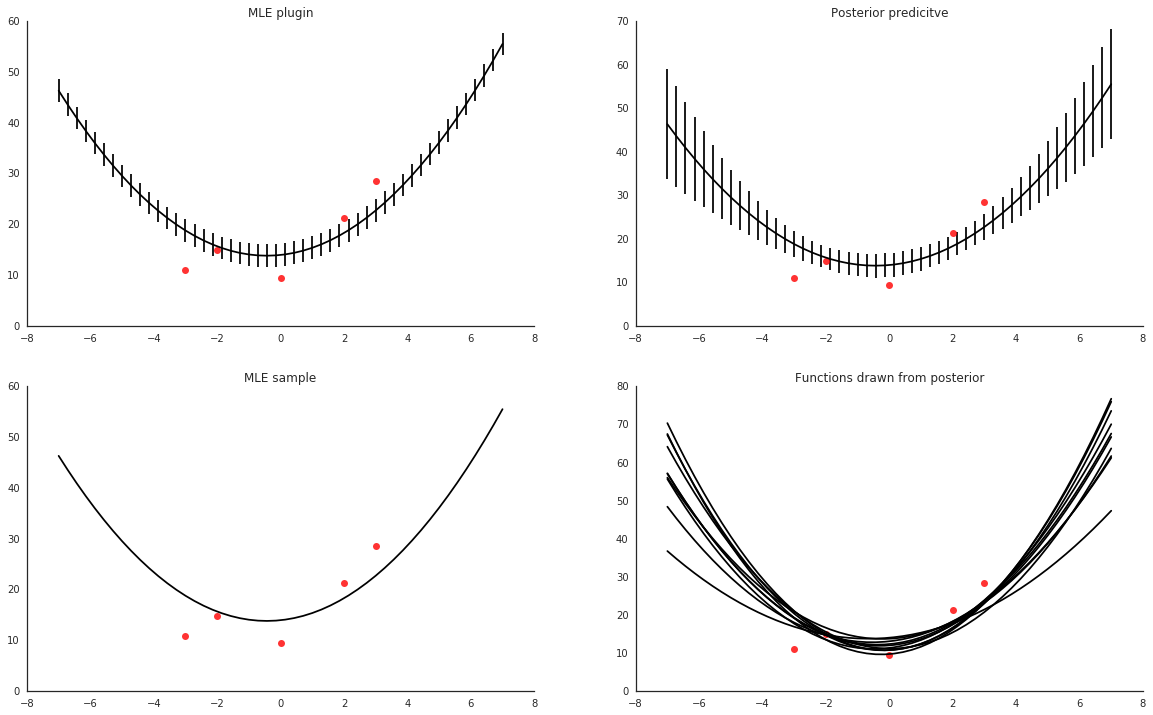

In [192]:
fig = pl.figure(figsize = (20, 12))
sns.set_style('white')

ax = fig.add_subplot(221)
ax.plot(x_data, y_data, 'ro', alpha = 0.8, mew = 0)
ax.errorbar(X_plot, y_plot, yerr=sigma, fmt='k-')

ax.set_title(r'MLE plugin')
ax = fig.add_subplot(222)
ax.plot(x_data, y_data, 'ro', alpha = 0.8, mew = 0)
ax.errorbar(X_plot, y_plot, yerr=w_err, fmt='k-')
ax.set_title(r'Posterior predicitve')

ax = fig.add_subplot(223)
ax.plot(x_data, y_data, 'ro', alpha = 0.8, mew = 0)
ax.plot(X_plot, w_MLE.dot(X_test.T), 'k-')
ax.set_title(r'MLE sample')

ax = fig.add_subplot(224)
ax.plot(x_data, y_data, 'ro', alpha = 0.8, mew = 0)
for w in np.random.multivariate_normal(mean=w_N, cov = V_N, size=10):
    ax.plot(X_plot, w.dot(X_test.T), 'k-')
ax.set_title(r'Functions drawn from posterior')

sns.despine(fig = fig)